In [1]:
import torch
import numpy as np, numpy.random as nr
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import trange

In [6]:
def get_xor_data():
    x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
    y = torch.tensor([0, 1, 1, 0], dtype=torch.float32)
    return x, y

x, y = get_xor_data()

In [32]:
n_epochs = 3000
loss_fn = torch.nn.MSELoss(reduction='mean')

def train(lr):
    torch.manual_seed(1)
    model = torch.nn.Sequential(
        torch.nn.Linear(2, 2), torch.nn.Sigmoid(),
        torch.nn.Linear(2, 1), torch.nn.Sigmoid(),
        torch.nn.Flatten(0, 1)
    )    
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    loss_history = pd.Series(index=range(n_epochs), dtype=np.float32, name=f'{lr:.0e}')
    
    for idx in trange(n_epochs):
        loss = loss_fn(model(x), y)
        loss_history[idx] = loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return loss_history

100%|█████████████████████| 3000/3000 [00:00<00:00, 3280.29it/s]


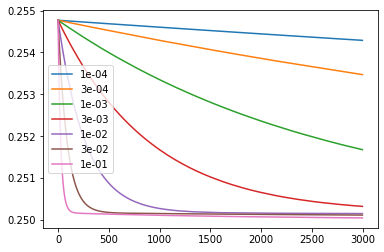

In [33]:
# Слишком маленькая скорость
lrs_0 = 1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2, 1e-1
losses = pd.concat([train(lr) for lr in lrs_0], axis=1)
_ = losses.plot()

100%|█████████████████████| 3000/3000 [00:00<00:00, 3166.34it/s]


<AxesSubplot:>

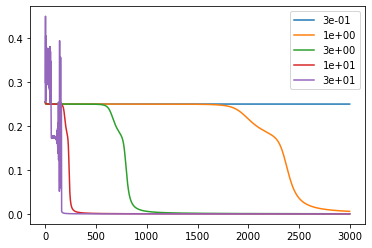

In [31]:
# Подходящая скорость
lrs_1 = 3e-1, 1, 3, 10, 30
losses = pd.concat([train(lr) for lr in lrs_1], axis=1)
_ = losses.plot()

100%|█████████████████████| 3000/3000 [00:00<00:00, 3035.34it/s]


<AxesSubplot:>

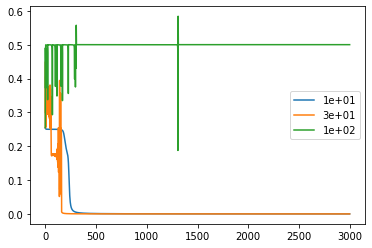

In [30]:
# Слишком большая скорость
lrs_2 = 10, 30, 100
losses = pd.concat([train(lr) for lr in lrs_2], axis=1)
_ = losses.plot()